#### Importowanie bibliotek

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [44]:
df = pd.read_csv("Metabolomics_Final_clean.csv")

#### Standaryzacja danych

In [45]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns (excluding 'Name' and 'Group')
numeric_columns = df.drop(['Name', 'Group'], axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify standardization
print("Mean of standardized features:")
print(df[numeric_columns].mean().mean())
print("\nStandard deviation of standardized features:")
print(df[numeric_columns].std().mean())

Mean of standardized features:
2.8511253912073764e-18

Standard deviation of standardized features:
1.0047506205640333


#### Analiza PCA

Variance explained by PC1: 23.88%
Variance explained by PC2: 13.21%
Total variance explained: 37.09%


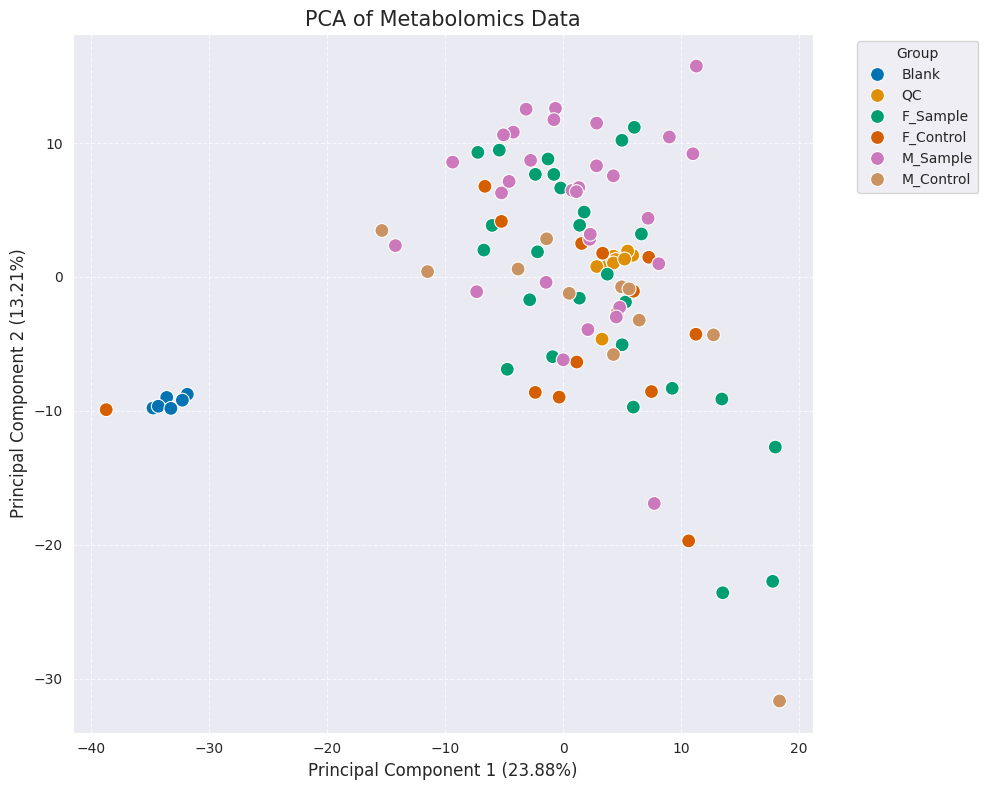

In [46]:
# Exclude non-numeric columns
X = df.drop(['Name', 'Group'], axis=1)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Group'] = df['Group']
pca_df['Name'] = df['Name']

# Calculate variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='colorblind', s=100)

# Add a title and labels
plt.title('PCA of Metabolomics Data', fontsize=15)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%})', fontsize=12)

# Add a legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve the layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Jeden obiekt z F_Control jest znacznie oddalony od reszty obiektów z tej grupy. Najbliżej mu do Blank. Taki punkt jedynie przeszkodzi w analizie, tym samym należy go znaleźć i wyeliminować.

In [47]:
# Get F_Control samples from pca_df
f_control = pca_df[pca_df['Group'] == 'F_Control']

# Calculate distance from the mean of F_Control group
f_control_mean = f_control[['PC1', 'PC2']].mean()
distances = ((f_control['PC1'] - f_control_mean['PC1'])**2 + 
            (f_control['PC2'] - f_control_mean['PC2'])**2)**0.5

# Find the sample with maximum distance
outlier = f_control.loc[distances.idxmax()]

print("Outlier sample details:")
print(f"Name: {outlier['Name']}")
print(f"PC1: {outlier['PC1']:.2f}")
print(f"PC2: {outlier['PC2']:.2f}")
print(f"Distance from mean: {distances.max():.2f}")

Outlier sample details:
Name: F_Control13
PC1: -38.75
PC2: -9.91
Distance from mean: 39.23


Ten obiekt to F_Control13, zostanie on usunięty z dalszej analizy.

Variance explained by PC1: 21.87%
Variance explained by PC2: 13.43%
Total variance explained: 35.30%


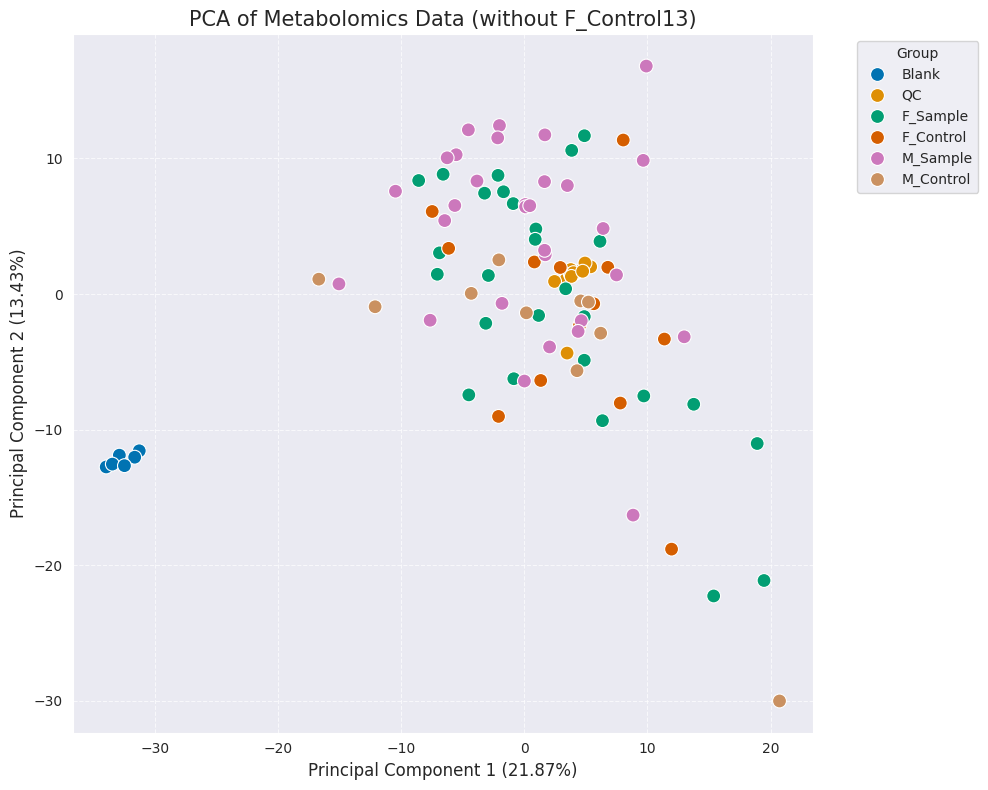

In [48]:
# Remove F_Control13 from the original dataframe
df_filtered = df[df['Name'] != 'F_Control13']

# Exclude non-numeric columns and apply PCA
X_filtered = df_filtered.drop(['Name', 'Group'], axis=1)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_filtered)

# Create new PCA dataframe
pca_df_filtered = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df_filtered['Group'] = df_filtered['Group']
pca_df_filtered['Name'] = df_filtered['Name']

# Calculate new variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

# Create a new scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df_filtered, palette='colorblind', s=100)

# Add a title and labels
plt.title('PCA of Metabolomics Data (without F_Control13)', fontsize=15)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%})', fontsize=12)

# Add a legend
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve the layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [49]:
df

,Name,Group,Metabolite1,Metabolite2,Metabolite3,Metabolite4,Metabolite5,Metabolite6,Metabolite7,Metabolite8,...,Metabolite490,Metabolite491,Metabolite492,Metabolite493,Metabolite494,Metabolite495,Metabolite496,Metabolite497,Metabolite498,Metabolite499
0,Blank1,Blank,0.296615,-0.710610,-2.901369,-0.650964,-2.043614,-2.597074,-0.693295,-1.712962,...,-1.574612,-2.467548,-2.536572,-2.490805,-2.003194,-2.311642,-1.859828,-0.899026,-1.059757,1.601031
1,Blank2,Blank,0.624823,-0.824232,-3.064853,-0.643874,-1.971934,-2.661216,-0.747467,-1.695005,...,-1.698349,-2.424475,-2.061359,-2.510388,-1.970903,-2.707443,-2.015263,-1.116769,-0.958053,1.550572
2,Blank3,Blank,0.543235,-0.847690,-2.977496,-0.628404,-2.038637,-2.617125,-0.782076,-1.727032,...,-1.649857,-2.407774,-1.945904,-1.908089,-1.706653,-2.343369,-2.249237,-0.895772,-1.324801,1.190342
3,Blank4,Blank,0.406324,-0.895123,-3.013405,-0.649124,-2.140211,-2.636845,-0.823426,-1.806523,...,-1.654070,-2.385215,-2.428903,-2.384586,-1.777461,-2.539272,-2.104816,-1.100319,-0.979092,1.139858
4,Blank5,Blank,0.494052,-0.826526,-3.102939,-0.646171,-2.129675,-2.663344,-0.844134,-1.783338,...,-1.665414,-2.478773,-2.346813,-2.649243,-1.823204,-3.053594,-2.154647,-1.003644,-1.180963,0.732897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,M_Control7,M_Control,1.028682,0.953911,1.174678,-0.506183,0.585062,1.199051,0.613144,-0.390752,...,0.015678,-0.273687,0.812265,0.812952,1.214830,0.586627,0.799788,-0.423975,0.604094,-0.324318
102,M_Control8,M_Control,0.368854,0.452525,-0.237022,0.654486,-0.571316,-0.529163,0.582493,-0.389781,...,-0.330618,-0.646948,0.565740,0.569746,0.305116,0.679130,-0.891708,-0.619212,0.927556,-0.475174
103,M_Control9,M_Control,-0.451909,0.406234,0.698629,0.426910,-0.394235,0.889518,1.644379,-0.391938,...,-0.165765,0.396610,-0.468149,-0.450231,-1.935007,0.111159,-0.768827,0.058936,0.882079,0.424344
104,M_Control10,M_Control,0.582630,0.359616,0.251919,0.601866,0.302664,0.278962,0.466745,0.565072,...,0.689082,0.121789,0.628705,0.631869,0.041644,1.225840,-1.039015,-0.459920,1.820071,-0.490776


In [50]:
pd.read_csv("Metabolomics_Final_clean.csv")[pd.read_csv("Metabolomics_Final_clean.csv")['Name'] != "F_Control13"].to_csv("Metabolomics_Final_clean_filtered.csv", index=False)

#### Wykres opisywanej wariancji przez 10 głównych składowych

PC1: 21.87%
PC2: 13.43%
PC3: 9.44%
PC4: 6.94%
PC5: 5.71%
PC6: 3.75%
PC7: 3.37%
PC8: 2.67%
PC9: 2.01%
PC10: 1.83%
Total variance explained: 71.02%


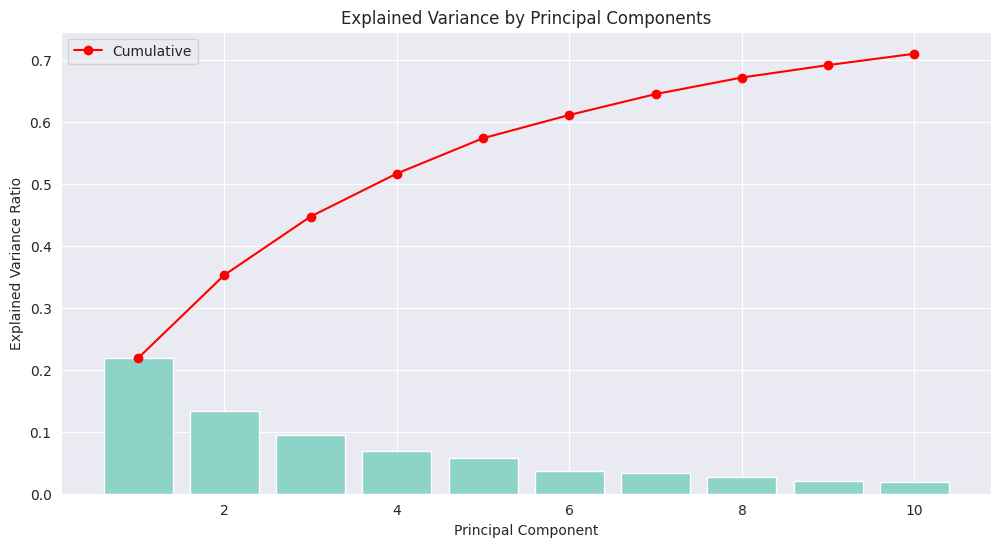

In [51]:
# Apply PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_filtered)

# Calculate and plot explained variance for each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.bar(range(1, 11), explained_variance)
plt.plot(range(1, 11), np.cumsum(explained_variance), 'r-o', label='Cumulative')

# Customize plot
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)

# Show variance values
for i, v in enumerate(explained_variance):
    print(f'PC{i+1}: {v:.2%}')
print(f'Total variance explained: {sum(explained_variance):.2%}')

plt.show()